
# Project: Investigate Medical Appointment Dataset¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from over 100,000 (110527) medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Columns:

● 'PatientId'- Patient Identification<br>
● 'AppointmentId'- Identification of each appointment<br>
● 'Gender'- Either Male or female, sex of the patiennt <br>
● 'ScheduledDay'-  tells us on
what day the patient set up their
appointment.<br>
● 'AppointmentDay'- the day of the actual appointment.<br>
● 'Age'- Age of the patient<br>
● 'Neighbourhood'- indicates the
location of the hospital, where the appointment takes place.<br>
● 'Scholarship'= (True or FAlse) indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.<br>
● 'Hipertension'- (True or False)indicates if a patient is hypertensive<br>
● 'Diabetes'- (True or false) tells us if a patient is diabetic<br>
● 'Alcoholism'-  (True or False) indicates if a patient is an alcoholic<br>
● 'handcap'- (True or false) indicates if patient is handicapped<br>
● 'sms_received'- number of messages (reminders) sent to patient<br>
● 'No-show'- It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.<br>

#### Source: Kaggle


### Question
1. What Age range is more represented and captured in the dataset?.<br>
2. How does booking in advance relate to showing up for appointments? <br>
3. Do some neighbourhoods account for better attendance in Appointments?<br>
4. What amount of patients based on gender showed for their appointment? <br>

In [2]:
#import libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.8MB/s eta 0:00:01  7% |██▎                             | 737kB 25.1MB/s eta 0:00:01    19% |██████▎                         | 2.1MB 27.3MB/s eta 0:00:01    32% |██████████▍                     | 3.4MB 26.0MB/s eta 0:00:01    94% |██████████████████████████████▏ | 9.9MB 27.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.9MB/s eta 0:00:01   19% |██████                          | 2.5MB 26.8MB/s eta 0:00:01    27% |████████▉                       | 3.7MB 24.8MB/s eta 0:00:01    36% |███████████▉                    | 4.9MB 25.4MB/s eta 0:00:01    80% |█████████████████████████▋      | 10.7MB 20.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninst

<a id='wrangling'></a>
## Data Wrangling

● We load in the csv data source into a pandas dataframe 'df_app'

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_app = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_app.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


● Take a look at the dataframes properties

In [4]:
#view summary of dataframe...
df_app.info(), df_app.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(None, (110527, 14))

- It can be observed from above that there are no missing values so no need to check for nulls

● We rename some column names for better understanding and referencing

In [9]:
#renaming columns for better understanding
df_app.rename(columns = {"No-show":"Missed_Appointment", "AppointmentDay":"appointment_day","scheduledday":"scheduled_day","appointmentid":"appointment_id"}, inplace=True )

● Change the column names to all lower case

In [10]:
#make the column names lowercase for easy referencing
df_app.columns = df_app.columns.str.lower()

● View the column names to inspect and confirm changes

In [11]:
#check to see all columns
df_app.columns

Index(['patientid', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'missed_appointment'],
      dtype='object')


● Scan through column datatypes for incorrect formats.

In [12]:
#check that all columns are in correct datatypes
df_app.dtypes

patientid             float64
appointment_id          int64
gender                 object
scheduled_day          object
appointment_day        object
age                     int64
neighbourhood          object
scholarship             int64
hipertension            int64
diabetes                int64
alcoholism              int64
handcap                 int64
sms_received            int64
missed_appointment     object
dtype: object

● We change the datetime column to date 

In [13]:
#convert 'ScheduledDay' and 'AppointmentDay' columns from Object(datetime) data type to object(date) format
df_app['scheduled_day'] = pd.to_datetime(df_app['scheduled_day']).dt.date
df_app['appointment_day'] = pd.to_datetime(df_app['appointment_day']).dt.date

● Let's check for any duplicates in our dataframe

In [14]:
#check for duplicate entries
df_app.duplicated().any()       # no duplicate entries found

False

● Add a new column to get the number of days booked in advance for appointment (appointment_day column - scheduled_day column)

In [15]:
#new column to calculate number of days in advance appointment was booked
df_app['advanced_booking'] = (df_app['appointment_day'] - df_app['scheduled_day']).dt.days

● We inspect the dataframe again to inspect changes

In [16]:
#inspecting dataframe
df_app.head(3)

,patientid,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,advanced_booking
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0


● Now lets get some basic summary statistics for ourr dataframe

In [17]:
#view the summary statistics of the dataframe
df_app.describe()

,patientid,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,advanced_booking
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


● Give a general plot to visualize the dataframe

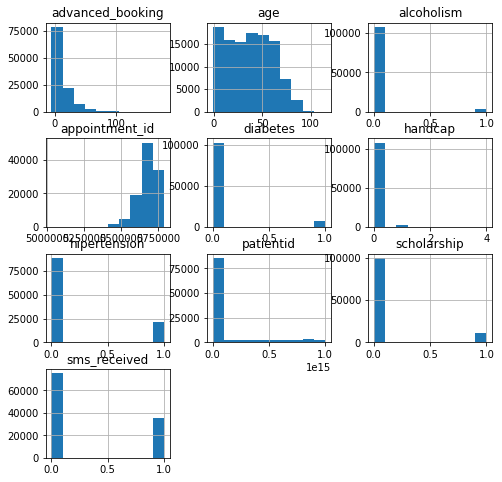

In [18]:
#view general characteristics
df_app.hist(figsize=(8,8));

<a id='eda'></a>
## Exploratory Data Analysis




### Distribution of values of showing up or not for appointments

Here we visualize the number of patients who did or did not show up for their appointments. This will give us insight into general response of patients to their appointments.

- We use .value_counts() to count number of patients that showed and did not show up for their appointments.

In [19]:
#total number of missed and attended appointments
df_app.missed_appointment.value_counts()

No     88208
Yes    22319
Name: missed_appointment, dtype: int64

- Using the above statistics we use a bar plot to visualize the counts.

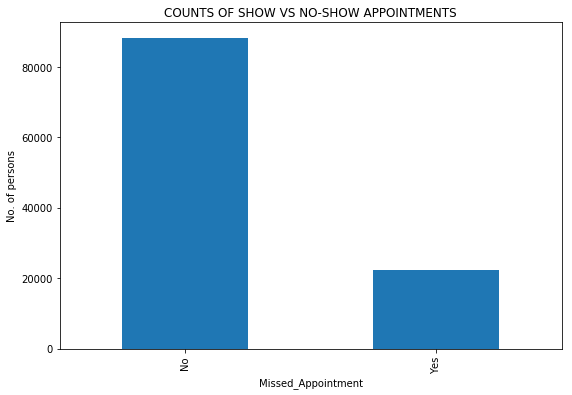

In [20]:
#plotting the above statistic on a bar plot
df_app.missed_appointment.value_counts().plot(kind="bar", figsize=(9,6));
plt.xlabel('Missed_Appointment')
plt.ylabel('No. of persons')
plt.title('COUNTS OF SHOW VS NO-SHOW APPOINTMENTS');

The above bar plot shows the difference between the number of patients who showed up and those who did not show up.<br>
From the plot, it can be seen that the number of those who showed up for their appointments is more than that of those who did not show up.

- The below statistics further presents the above analysis as percentages

In [21]:
#subset of those that attended their appointment
not_missed = df_app.missed_appointment == "No"
not_missed_mean = not_missed.mean()
not_missed_mean * 100

79.8067440534892

The above statistics shows that 79.8% of patients showed up

In [22]:
#subset of those that missed their appointment
missed = df_app.missed_appointment == "Yes"
missed_mean = missed.mean()
missed_mean * 100

20.193255946510806

The above statistics shows that 20.2% of patients did not show up

### Questions

 ### Q1  What Age range is more represented and  captured in the dataset? 

This question aims to find out what ages make up the entries for the appointment for both those that showed up for their appointment and those that didn't.

- We write a function to create a histogram for distribution of any continous feature on the show or no-show appointments

In [23]:
#function to create histogram for distribution of a continous feature on show or no-show appointments
#coln - continous feature
#val - df_app.missed_appointment
#xlab - x-axis label
#ylab - y-axis label
def plothist(coln, val, xlab, ylab, title):
    
    missed = val == "Yes"
    not_missed = val == "No"
    
    plt.hist(coln[not_missed], alpha=0.9, color='red', label= 'No')
    plt.hist(coln[missed], alpha=0.9, color='black', label= 'Yes' )
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.legend()
    plt.grid(True)
plt.show()
    

- To plot the histogram for this distribution, we call the function 'plothist' created above.

(6         23
 7         39
 11        29
 17        40
 20        30
           ..
 110484    45
 110492    33
 110496    37
 110515    33
 110516    37
 Name: age, Length: 22319, dtype: int64, 0         62
 1         56
 2         62
 3          8
 4         56
           ..
 110522    56
 110523    51
 110524    21
 110525    38
 110526    54
 Name: age, Length: 88208, dtype: int64)

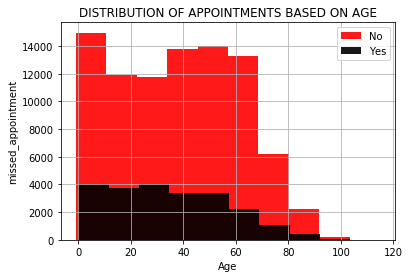

In [24]:
plothist(df_app.age,df_app.missed_appointment, 'Age', 'missed_appointment', "DISTRIBUTION OF APPOINTMENTS BASED ON AGE")
df_app.age[missed],df_app.age[not_missed]

The histogram above shows that younger patients made up a great number of the patients who showed and didn't show up for their appointments. It can be seen that ages around 0-60 had higher numbers of appointment.

### Q2  How does booking in advance relate to showing up for appointments?

This question seeks to understand if booking in advance and by how long the appointment was booked affects showing up for appointments or not.

- We use a histogram to show this relation by calling the function created in Question 1 above.

(6         2
 7         2
 11        3
 17        1
 20        2
          ..
 110484    4
 110492    0
 110496    2
 110515    2
 110516    1
 Name: advanced_booking, Length: 22319, dtype: int64, 0          0
 1          0
 2          0
 3          0
 4          0
           ..
 110522    35
 110523    35
 110524    41
 110525    41
 110526    41
 Name: advanced_booking, Length: 88208, dtype: int64)

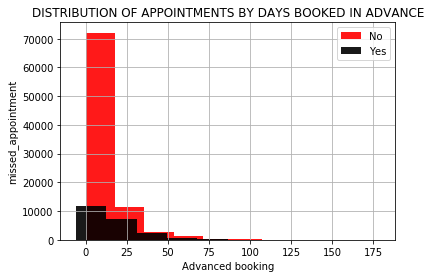

In [25]:
#function to create histogram for distribution of a continous feature on show or no-show appointments
plothist(df_app.advanced_booking, df_app.missed_appointment, "Advanced booking", 'missed_appointment', "DISTRIBUTION OF APPOINTMENTS BY DAYS BOOKED IN ADVANCE")
df_app.advanced_booking[missed], df_app.advanced_booking[not_missed]

The plot above shows that a greater number of people who showed up for their appointments booked around 0-20 days prior to their appointments. Although it can be seen that the number of days booked in advance doesn't determine if the patient will show up or not.

### Q3. Do some neighbourhoods account for better attendance in Appointments?

With this question, we want to check if there are preferred neighbourhoods with higher turn up of patients.

- We get the counts of each neighbourhood for patients that showed up for their appointments

In [26]:
#shows neighbourhoods with amount of show up for appointments
df_show = df_app.query("missed_appointment == 'No'") #creates dataframe with only patient that showed up/
df_show['neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

- Using the above statistics we plot a bar chart to visualize the attendance at each neighbourhood

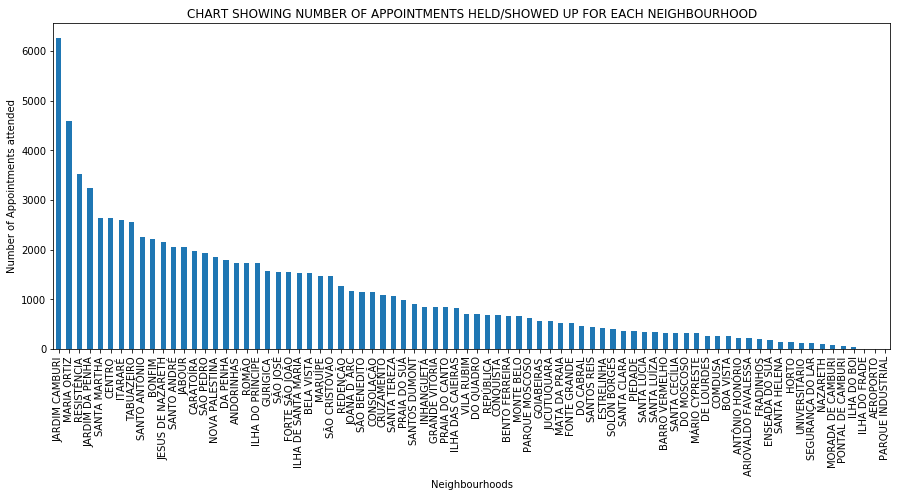

In [27]:
# bar plot to show neighbourhoods with amount of show up for appointments
df_show['neighbourhood'].value_counts().plot(kind='bar', figsize=(15,6));
plt.title('CHART SHOWING NUMBER OF APPOINTMENTS HELD/SHOWED UP FOR EACH NEIGHBOURHOOD')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Appointments attended')
plt.show()

Yes, the plot shows that the different neighbourhoods account for different levels of attendance, The bar plot above shows that the "JARDIM CAMBURI" neighbourhood had the highest number of patients who showed up for their appointments. The attendance at each neighbourhood can be seen, although the reasons for these variations are not analysed here.

### Q4. What amount of patients based on gender showed  for their appointment?

Here we want to know the number of male and female patients who showed up for their appointments.

- We use the .value_counts() function to count the number of both male and female that showed for their appointments.

In [31]:
#shows amount per gender who showed for their appointments
df_show = df_app.query("missed_appointment == 'No'") #this gives a dataframe with only patients that showed up
df_show['gender'].value_counts()        #this gets the gender column from the above dataframe and counts values of each gender

F    57246
M    30962
Name: gender, dtype: int64

- Using the above statistics, we plot a bar plot to show the counts by gender of patients who showed up for their appointments

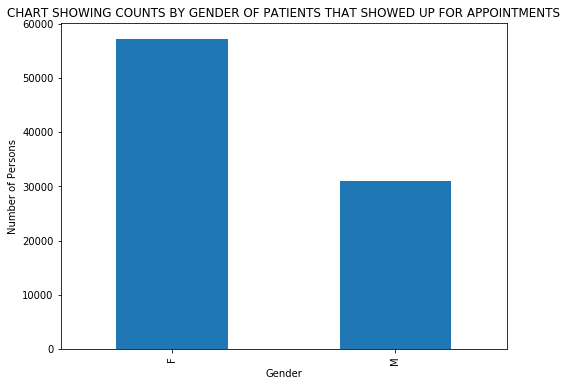

In [34]:
# bar plot to show amount per gender who showed for their appointments
df_show = df_app.query("missed_appointment == 'No'")
df_show['gender'].value_counts().plot(kind='bar', figsize=(8,6));
plt.title('CHART SHOWING COUNTS BY GENDER OF PATIENTS THAT SHOWED UP FOR APPOINTMENTS')
plt.xlabel('Gender')
plt.ylabel('Number of Persons')
plt.show()
 

The bar chart above shows that females were recorded to show up more in number than males with females count at 57246 and males count at 30962.

<a id='conclusions'></a>
## Conclusions
 From the dataset, majority of persons(entries) showed up for their appointments. The analysis also showed that people who booked their appointments within 0-15 days were more likely to attend appointments than those who booked over 15 days earlier.
It was also found that the number of appointments at the different neighbourhoods(locations) varied with 'JARDIM CAMBURI' having the highest number of patients who showed up for their appointments and also those who didn't show up.
 Finally, more females were found to show up for their appointments but this isn't conclusive due to suspicions of bias as the dataset contains more females than males.


 ### Limitations
  
 - The features in this dataset are not enough to predict accurately why patients did not show up for their appointments. More features are needed like Employment status of the patients and their free days, and patients illness or diseases.


In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0